# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D. \
_Student No._: 2021-04594 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** 

I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work. 


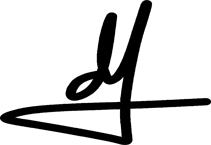

In [77]:
from IPython.display import Image #run cell to display e-sig
Image(filename="sig.png")

**DAVID D. DAFFON**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [78]:
import os 
import sys

cur_path = os.path.abspath(os.path.join(''))
if cur_path not in sys.path:
    sys.path.append(cur_path)

Run this command to list the directories in your Google Drive and check that the mount was successful.

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [79]:
import numpy as np

data = np.load('galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [80]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape)
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [81]:
import pandas as pd # Preparations
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df = pd.DataFrame(data) # I create a DataFrame 'df' which contains the data from 'galaxy_catalogue.npy'
# display(df) # I inspect df to get understand the data
df.head(300)

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.95584,0.84675,0.43053,0.35433,0.893320,2.419020,2.462600,2.458133,2.433532,2.436524,4.812139,4.017690,3.664149,12.686280,11.747320,10.595790,elliptical
296,1.88667,0.92931,0.42318,0.31095,0.777368,2.427018,2.363907,2.351392,2.366157,2.382185,4.052593,3.079214,2.950735,10.147290,10.514440,10.504360,elliptical
297,1.40129,0.78604,0.42137,0.29661,0.816927,2.134726,2.280204,2.326601,2.342370,2.344131,2.414648,2.577656,2.476750,6.295191,6.899981,7.171607,elliptical
298,1.83167,0.90517,0.41991,0.34113,0.907686,2.445753,2.415545,2.422371,2.413603,2.427759,7.056595,4.971563,4.365674,20.769240,16.816910,15.469410,elliptical


In [83]:
def get_features_targets(input): # I define the function as asked, taking in 'input' 
    
    df = pd.DataFrame(input) # The input is cast into a DataFrame

    df1 = df.iloc[:,:16] # From inspection of 'data', I know I need to separate the first 16 columns from the last column
    df2 = df.iloc[:,16:]    

    df1.loc[:, "R50/R90_u"] = df1['petroR50_u']/df1['petroR90_u']
    df1.loc[:, "R50/R90_r"] = df1['petroR50_r']/df1['petroR90_r']
    df1.loc[:, "R50/R90_z"] = df1['petroR50_z']/df1['petroR90_z']

    df1 = df1.drop(columns=['petroR50_u', 'petroR50_r', 'petroR50_z', 'petroR90_u', 'petroR90_r', 'petroR90_z'], axis=1)

    features, targets = df1, df2
    
    return features, targets


In [84]:
f, t = get_features_targets(data)

In [85]:
display(f, t)

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,R50/R90_u,R50/R90_r,R50/R90_z
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,0.353735,0.322113,0.339692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,0.428644,0.472435,0.437152
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,0.519802,0.415303,0.390645
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,0.484092,0.434376,0.465523
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,0.334817,0.546294,0.479873


,class
0,merger
1,merger
2,merger
3,merger
4,merger
...,...
775,spiral
776,spiral
777,spiral
778,spiral


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [86]:
from sklearn import model_selection, metrics, tree
data  = np.load('galaxy_catalogue.npy')

In [87]:
def predict_class(input):

    d_train, d_test = model_selection.train_test_split(input, test_size=0.2, train_size=0.8, random_state=100)
    df_train = pd.DataFrame(d_train)
    df_test = pd.DataFrame(d_test)

    f_train, t_train = get_features_targets(df_train)
    f_test, t_test = get_features_targets(df_test)

    cls = tree.DecisionTreeClassifier()

    cls = cls.fit(f_train, t_train)

    t_pred = cls.predict(f_test)

    predicted_class, actual_class = t_pred, t_test

    return predicted_class, actual_class


In [88]:
predicted_class, actual_class = predict_class(data)

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

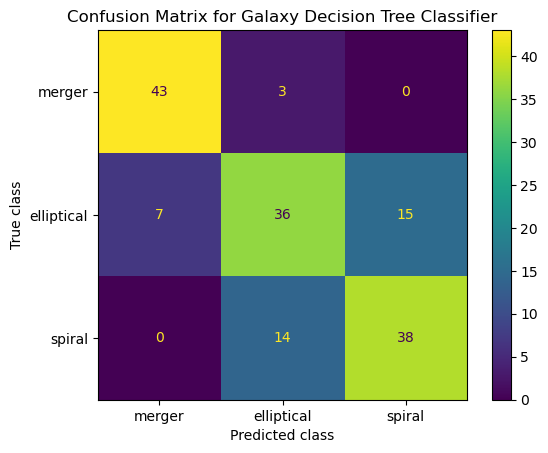

In [89]:
c_mat = metrics.confusion_matrix(actual_class, predicted_class)
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = c_mat, display_labels = ['merger', 'elliptical', 'spiral'])

cm_disp.plot()
plt.title('Confusion Matrix for Galaxy Decision Tree Classifier')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [90]:
accuracy = metrics.accuracy_score(predicted_class, actual_class)
print("The decision tree classifier's accuracy is", accuracy)

The decision tree classifier's accuracy is 0.75
